In [109]:
from scipy.optimize import minimize
from numpy import float128
from functools import reduce
from operator import mul
from math import e

l = 3

def f(x):
    r, T = x
    return reduce(mul, [(1 - e ** (-r ** (d - 1) * T )) ** ((1 - r) * r ** (d - 1) * T) for d in range(1, l + 1)])

bounds = ([0, 1], [0, 10000])

res = minimize(f, [float128(0.5), float128(10)], bounds=bounds, tol=1e-100, options={'maxiter': 10000000})

print(res.x)


[0.27414251 1.47467184]


/tmp/ipykernel_2559/949600821.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return reduce(mul, [(1 - e ** ((-r ** (d - 1) - r ** l) * T / (1 - r ** l))) ** ((r ** (d - 1) - r ** d) * T / (1 - r ** l)) for d in range(1, l + 1)])
/tmp/ipykernel_2559/949600821.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return reduce(mul, [(1 - e ** ((-r ** (d - 1) - r ** l) * T / (1 - r ** l))) ** ((r ** (d - 1) - r ** d) * T / (1 - r ** l)) for d in range(1, l + 1)])


[np.float64(0.0), np.float64(0.12960141994186597), np.float64(0.2293155526522948), np.float64(0.3042554640826711), np.float64(0.3637385989143416), np.float64(0.41257829426286063), np.float64(0.4536249551509569), np.float64(0.48872414116428153), np.float64(0.5191479227334838), np.float64(0.5458133577777339), np.float64(0.5694038636846211), np.float64(0.5904419144046699), np.float64(0.6093351157360821), np.float64(0.6264067699593843), np.float64(0.641917104009976), np.float64(0.6560779922902604), np.float64(0.669064056417548), np.float64(0.6810203786182393), np.float64(0.6920687886158123), np.float64(0.7023122137168453), np.float64(0.7118383802429978), np.float64(0.7207224881056912), np.float64(0.7290293370479045), np.float64(0.7368152102849971), np.float64(0.7441292392196558), np.float64(0.7510142556976044), np.float64(0.7575082518025301), np.float64(0.7636444751434739), np.float64(0.7694527566682343), np.float64(0.7749594188389883), np.float64(0.7801880905112198), np.float64(0.78515997

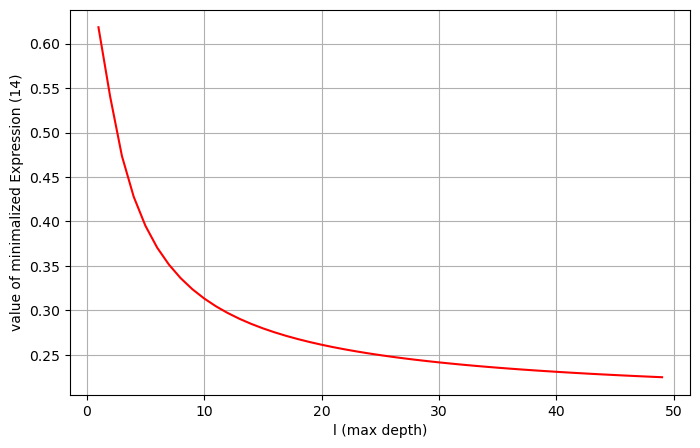

In [110]:
import matplotlib.pyplot as plt

vals = []
Ts = []
rs = []
xs = []

def probability_function(x):
    r, T = x
    return reduce(mul, [(1 - e ** ((-r ** (d - 1) - r ** l) * T / (1 - r ** l))) ** ((r ** (d - 1) - r ** d) * T / (1 - r ** l)) for d in range(1, l + 1)])

for l in range(1, 50):
    bounds = ([0, 1], [0, 100])
    res = minimize(probability_function, [0.5, 1], bounds=bounds, tol=1e-100, options={'maxiter': 10000000}, method='l-bfgs-b')
    r, T = res.x

    rs.append(r)
    Ts.append(T)
    xs.append(l)
    vals.append(probability_function(res.x))
print([(x) for x in rs])
print([(x) for x in Ts])
print([(x) for x in vals])

import math
print(math.log(vals[-1], vals[0]))

plt.figure(figsize=(8, 5))
plt.plot(xs, vals, color='red')
plt.xlabel('l (max depth)')
plt.ylabel('value of minimalized Expression (14)')
plt.grid(True)
plt.show()

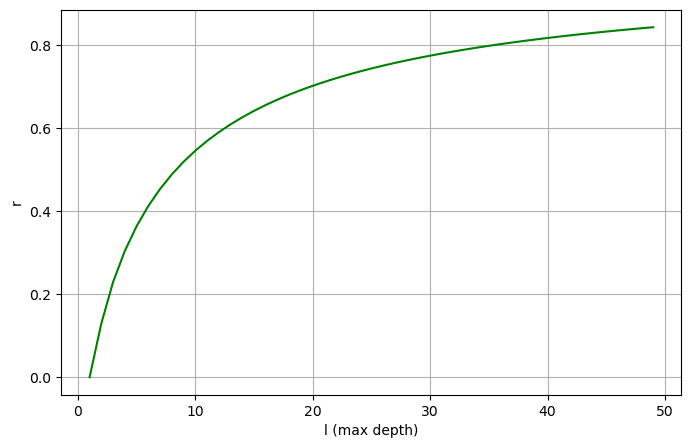

In [111]:
plt.figure(figsize=(8, 5))
plt.plot(xs, rs, color='green')
plt.xlabel('l (max depth)')
plt.ylabel('r')
plt.grid(True)

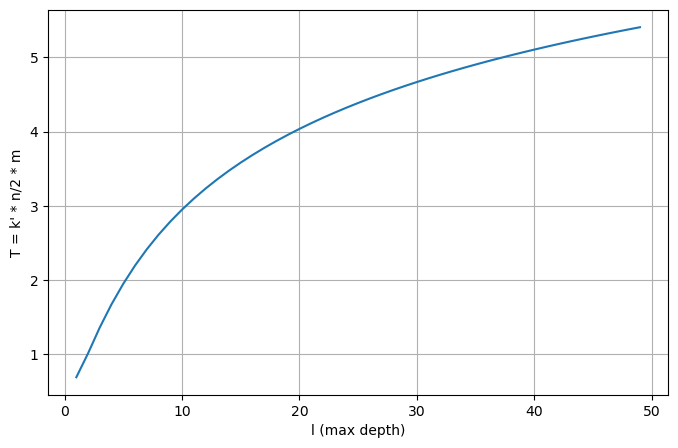

In [112]:
plt.figure(figsize=(8, 5))
plt.plot(xs, Ts)
plt.xlabel('l (max depth)')
plt.ylabel('T = k\' * n/2 * m')
plt.grid(True)

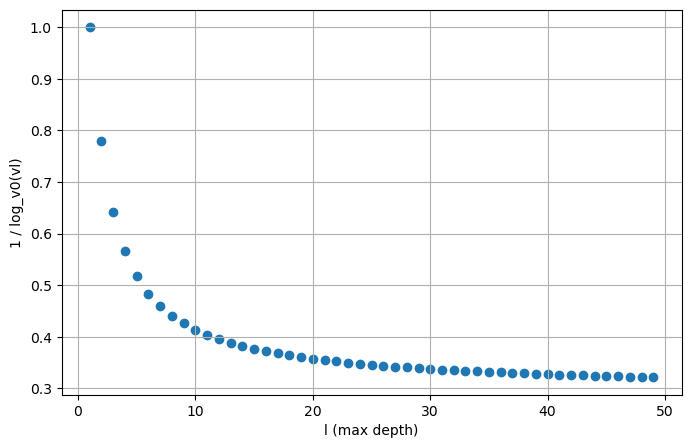

In [113]:
from math import log, e

vs = [pow(log(vals[i-1], vals[0]), -1) for i in xs]

plt.figure(figsize=(8, 5))
plt.scatter(xs, vs)
plt.xlabel('l (max depth)')
plt.ylabel('1 / log_v0(vl)')
plt.grid(True)


In [114]:
from math import log, e, ceil

n = 2 ** 19

print(vs[20-1])
m = - n * (log(2 ** (-256), e)) / (log(2, e) ** 2) * vs[20 - 1]
print(m, ceil(m), log(m, 2))

m = ceil(m)

0.3579608398625509
69313836.9263963 69313837 26.046640046479293


In [115]:
print(vals[20 - 1])
print(vals[1 - 1])
print(Ts[20 - 1])
print(rs[20 - 1])

k = 2 * Ts[20 - 1] * m / n

print(k, round(k))

k = round(k)

0.26127171958484513
0.618503137801576
4.036050258011821
0.7023122137168453
1067.1773136430334 1067


In [116]:
print("beta")
print([(1 - rs[20 - 1])/(1 - rs[20 - 1] ** 20) * rs[20 - 1] **(d - 1) for d in range(1, 21)])


beta
[np.float64(0.2979417289974273), np.float64(0.20924811525080758), np.float64(0.14695750703787222), np.float64(0.10321005209007691), np.float64(0.07248568016121283), np.float64(0.050907578496792595), np.float64(0.03575301414904648), np.float64(0.025109778514066525), np.float64(0.01763490413415374), np.float64(0.012385208561141859), np.float64(0.008698283241920363), np.float64(0.006108910559169228), np.float64(0.004290362498208351), np.float64(0.003013173983764442), np.float64(0.0021161888908516105), np.float64(0.0014862253045769902), np.float64(0.0010437941837394586), np.float64(0.0007330694038468267), np.float64(0.0005148435958237528), np.float64(0.0003615809455009207)]


1.8445039604232748e-87
-166.09640474436813


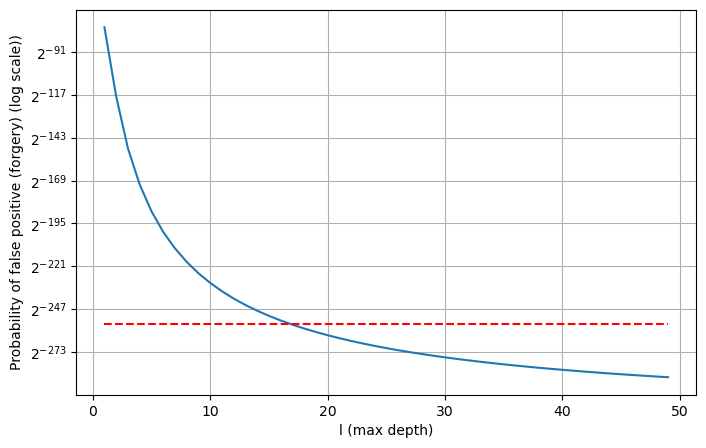

In [117]:
import matplotlib.pyplot as plt
from math import e, log

xs = []
ys = []
for depth in range(1, 50):
    xs.append(depth)
    prob = 1
    e2 = 1

    beta = []
    r = rs[depth - 1]
    T = Ts[depth - 1]
    k = int(T * 2 * m / n)
    beta_0 = (1-r)/(1-r**depth)
    beta = [beta_0 * r ** (d - 1) for d in range(1, depth + 1)]

    for d in range(0, depth):
        exponent = sum([beta[i] for i in range(d, depth)]) * k * n / m
        prob *= pow(1 - e ** (-exponent), beta[d] * k)
        e2 += e ** (-exponent)
    ys.append(prob)

print(min(ys))
plt.figure(figsize=(8, 5))
plt.xlabel('l (max depth)')
plt.ylabel('Probability of false positive (forgery) (log scale))')
plt.grid(True)
plt.yscale('log', base=2)
plt.plot(xs, ys)
plt.plot(xs, [2** -256 for _ in xs], color='red', linestyle='dashed')
print(log(10** -50, 2))

0.3579608398625509
m 34656918.46319815 34656919 25.046640046479297
0.26127171958484513
0.618503137801576
4.036050258011821
0.7023122137168453
k 533.5886645196716 533
4.2944230821347423e-44
-166.09640474436813


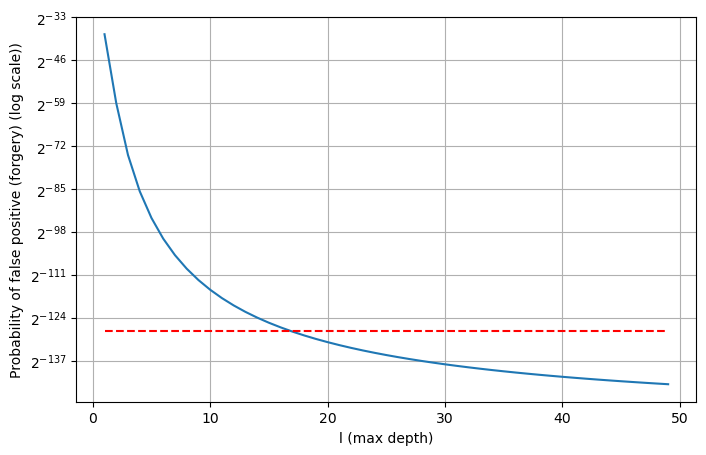

In [118]:
# 128-bit security
from math import log, e, ceil

n = 2 ** 19

print(vs[20-1])
m = - n * (log(2 ** (-128), e)) / (log(2, e) ** 2) * vs[20 - 1]
print("m", m, ceil(m), log(m, 2))

m = ceil(m)

print(vals[20 - 1])
print(vals[1 - 1])
print(Ts[20 - 1])
print(rs[20 - 1])

k = 2 * Ts[20 - 1] * m / n

print("k", k, int(k))

k = round(k)

xs = []
ys = []
for depth in range(1, 50):
    xs.append(depth)
    prob = 1
    e2 = 1

    beta = []
    r = rs[depth - 1]
    T = Ts[depth - 1]
    k = int(T * 2 * m / n)
    beta_0 = (1-r)/(1-r**depth)
    beta = [beta_0 * r ** (d - 1) for d in range(1, depth + 1)]

    for d in range(0, depth):
        exponent = sum([beta[i] for i in range(d, depth)]) * k * n / m
        prob *= pow(1 - e ** (-exponent), beta[d] * k)
        e2 += e ** (-exponent)
    ys.append(prob)

print(min(ys))
plt.figure(figsize=(8, 5))
plt.xlabel('l (max depth)')
plt.ylabel('Probability of false positive (forgery) (log scale))')
plt.grid(True)
plt.yscale('log', base=2)
plt.plot(xs, ys)
plt.plot(xs, [2** -128 for _ in xs], color='red', linestyle='dashed')
print(log(10** -50, 2))

In [119]:
# expected value of d
exp = 0
for d in range(1, 21):
    exp += beta[d - 1] * d

print(exp)

5.514908524891002
